In [1]:
import pandas as pd


# Extract text column from a dataframe
df = pd.read_csv('report_sentences_cleaned.csv', encoding="ISO-8859-1")

# Concatenate all words in text
text = pd.Series(df['v_clean']).str.cat(sep=' ')
text = text.replace('.',' . ')


sentences_list = [x.strip() for x in text.split(' . ')]
print('Total sentences: ' + str(len(sentences_list)))
from collections import Counter, OrderedDict
c = Counter( [len(s.split(' ')) for s in sentences_list ])
s = pd.Series([len(s.split(' ')) for s in sentences_list ])
print("Sentence statistics and number of words by sentence")
print(s.describe())


word_list = text.split()
print('Total words: ' + str(len(word_list)))
print('Vocabulary size: ' + str(len(set(word_list))))

# Remove stopwords
from nltk.corpus import stopwords
stopwords = set(stopwords.words("spanish")) - set(['sin', 'no', 'ni', 'con'])
stopwords.add('.')
print("Stopwords:")
print(len(stopwords))
word_list = [w.strip() for w in word_list if w.strip() not in stopwords]
print('Total words removing stopwords: ' + str(len(word_list)))
print('Vocabulary size removing stopwords: ' + str(len(set(word_list))))

# Stemmize
from nltk.stem.snowball import SpanishStemmer
stemmer = SpanishStemmer()
word_list = [stemmer.stem(w) for w in word_list ]
print('Total words removing stopwords and stemming: ' + str(len(word_list)))
print('Vocabulary size removing stopwords and stemming: ' + str(len(set(word_list))))



c = Counter( word_list )
s = pd.Series(c)
print('Statistics of frequency of different words')
print(s.describe())


Total sentences: 501960
Sentence statistics and number of words by sentence
count    501960.000000
mean          7.197787
std           7.406441
min           1.000000
25%           2.000000
50%           5.000000
75%           9.000000
max         190.000000
dtype: float64
Total words: 3850986
Vocabulary size: 14280
Stopwords:
310
Total words removing stopwords: 2585940
Vocabulary size removing stopwords: 14157
Total words removing stopwords and stemming: 2585940
Vocabulary size removing stopwords and stemming: 9729
Statistics of frequency of different words
count     9729.000000
mean       265.797101
std       2307.564879
min          1.000000
25%          1.000000
50%          2.000000
75%          9.000000
max      95890.000000
dtype: float64


In [2]:
x = c.most_common(2500)
x = pd.DataFrame([list(a) for a in x])
print(x[0:2500][:])


                   0      1
0                con  95890
1                sin  90484
2             derech  60425
3                 no  47274
4            hallazg  45997
5              cambi  45416
6           radiolog  44729
7             estudi  42737
8           izquierd  42232
9           signific  37812
10             alter  34731
11              sign  34305
12             previ  32082
13           infiltr  28627
14            pulmon  28069
15          pulmonar  23938
16           pleural  22936
17              epoc  21425
18          relacion  20122
19         bilateral  19961
20            aument  19600
21           respect  19499
22            normal  18056
23            derram  16807
24           probabl  16531
25            apreci  16220
26            extrem  15451
27              fech  15092
28          superior  14745
29        elongacion  13019
...              ...    ...
2470      consecuent      8
2471         acalasi      8
2472           imagn      8
2473            veng

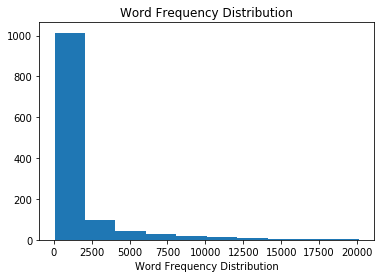

In [4]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
#Observation: most words appearing less than twice corresponds to missespelling so we can remove them from the final vocabulary
#Reduce vocabulary to words repeating more than twice (50 percentile)
final_vocabulary = x[0:int(len(x)*0.50)]
#Save remaining words
removed_vocabulary = x[int(len(x)*0.50) +1:-1]
plt.hist(final_vocabulary[18:int(len(x)*0.50)][1])
plt.title("Word Frequency Distribution")
plt.xlabel("Word Frequency Distribution")
plt.show()

# Word Cloud Plot

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud


# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=500,
        # update stopwords
        stopwords = stopwords)

# Generate and plot wordcloud
plt.imshow(wc.generate(text))
plt.axis('off')
plt.show()

ModuleNotFoundError: No module named 'wordcloud'